In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [84]:
data = pd.read_csv("loan_approval.csv")

In [99]:
data

,name,city,income,credit_score,loan_amount,years_employed,points,loan_approved
0,Allison Hill,East Jill,113810.0,389.0,39698.0,27.0,50.0,0.0
1,Brandon Hall,New Jamesside,44592.0,729.0,15446.0,28.0,55.0,0.0
2,Rhonda Smith,Lake Roberto,33278.0,584.0,11189.0,13.0,45.0,0.0
3,Gabrielle Davis,West Melanieview,127196.0,344.0,48823.0,29.0,50.0,0.0
4,Valerie Gray,Mariastad,66048.0,496.0,47174.0,4.0,25.0,0.0
...,...,...,...,...,...,...,...,...
1995,James Schaefer,Robertton,92163.0,770.0,12251.0,13.0,85.0,1.0
1996,Diana Lin,New Frank,38799.0,635.0,48259.0,17.0,40.0,0.0
1997,Brandon Meyer,East Haley,41957.0,763.0,16752.0,5.0,60.0,1.0
1998,Jason Price,Adamland,139022.0,360.0,24031.0,35.0,55.0,0.0


In [86]:
data["loan_approved"] = data["loan_approved"].astype(int)

In [115]:
data

,city,income,credit_score,loan_amount,years_employed,points,loan_approved
0,East Jill,113810.0,389.0,39698.0,27.0,50.0,0.0
1,New Jamesside,44592.0,729.0,15446.0,28.0,55.0,0.0
2,Lake Roberto,33278.0,584.0,11189.0,13.0,45.0,0.0
3,West Melanieview,127196.0,344.0,48823.0,29.0,50.0,0.0
4,Mariastad,66048.0,496.0,47174.0,4.0,25.0,0.0
...,...,...,...,...,...,...,...
1995,Robertton,92163.0,770.0,12251.0,13.0,85.0,1.0
1996,New Frank,38799.0,635.0,48259.0,17.0,40.0,0.0
1997,East Haley,41957.0,763.0,16752.0,5.0,60.0,1.0
1998,Adamland,139022.0,360.0,24031.0,35.0,55.0,0.0


In [88]:
data.dtypes

name               object
city               object
income              int64
credit_score        int64
loan_amount         int64
years_employed      int64
points            float64
loan_approved       int64
dtype: object

Handle Missing Values

In [89]:
categorical_cols = data.select_dtypes(include= ["object"]).columns
numerical_cols = data.select_dtypes(include= ["number"]).columns

In [90]:
categorical_cols

Index(['name', 'city'], dtype='object')

In [91]:
numerical_cols

Index(['income', 'credit_score', 'loan_amount', 'years_employed', 'points',
       'loan_approved'],
      dtype='object')

In [92]:
from sklearn.impute import SimpleImputer

num_imp = SimpleImputer(strategy="mean")
data[numerical_cols] = num_imp.fit_transform(data[numerical_cols])


In [93]:
cat_imp = SimpleImputer(strategy="most_frequent")
data[categorical_cols] = cat_imp.fit_transform(data[categorical_cols])


EDA  - exploratory data analysis

Text(0.5, 1.0, 'Is loan approved or not')

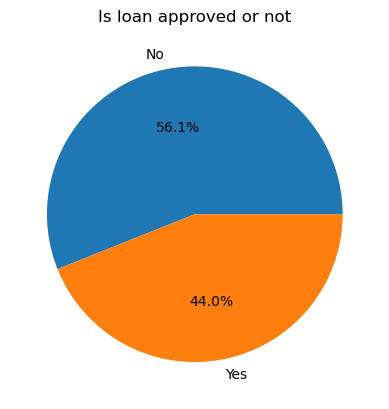

In [98]:
classes_count = data["loan_approved"].value_counts()
plt.pie(classes_count, labels=["No", "Yes"], autopct="%1.1f%%")
plt.title("Is loan approved or not")

<Axes: xlabel='income', ylabel='Count'>

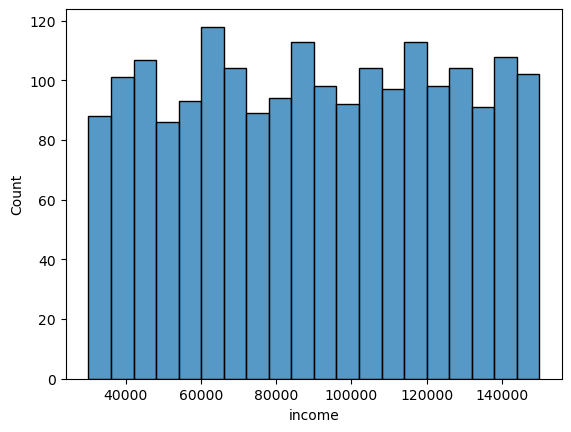

In [101]:
# nalyze income
sns.histplot(
    data = data,
    x = "income",
    bins = 20
)

<Axes: xlabel='credit_score', ylabel='Count'>

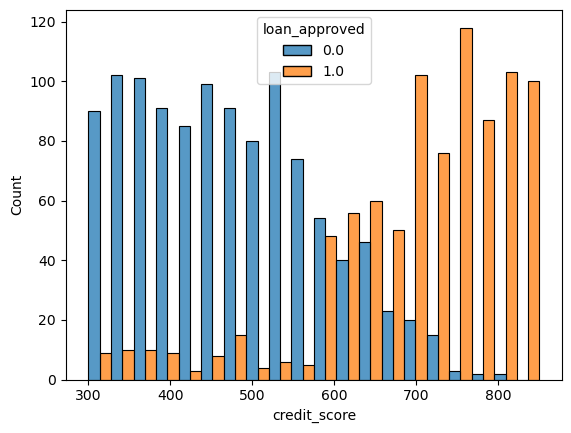

In [112]:
sns.histplot(
    data = data,
    x = "credit_score",
    hue="loan_approved",
    bins = 20,
    multiple="dodge"
)

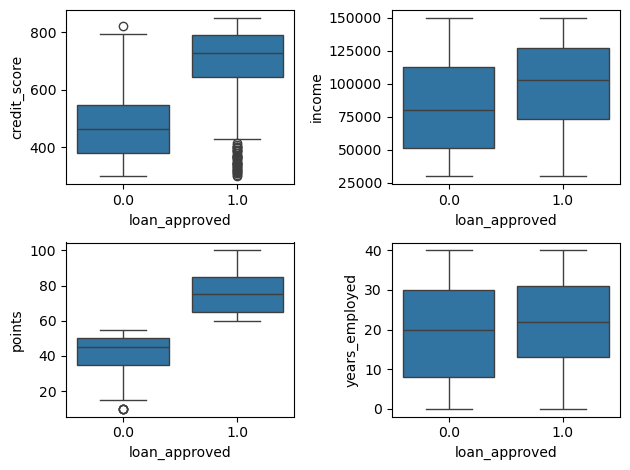

In [110]:
plot, axes = plt.subplots(2,2)

sns.boxplot(ax=axes[0,0] ,data=data, x="loan_approved", y="credit_score")
sns.boxplot(ax=axes[0,1] ,data=data, x="loan_approved", y="income")
sns.boxplot(ax=axes[1,0] ,data=data, x="loan_approved", y="points")
sns.boxplot(ax=axes[1,1] ,data=data, x="loan_approved", y="years_employed")
plt.tight_layout()

In [123]:
# Remove name
df = data.drop("city", axis=1)


In [125]:
df

,income,credit_score,loan_amount,years_employed,points,loan_approved
0,113810.0,389.0,39698.0,27.0,50.0,0.0
1,44592.0,729.0,15446.0,28.0,55.0,0.0
2,33278.0,584.0,11189.0,13.0,45.0,0.0
3,127196.0,344.0,48823.0,29.0,50.0,0.0
4,66048.0,496.0,47174.0,4.0,25.0,0.0
...,...,...,...,...,...,...
1995,92163.0,770.0,12251.0,13.0,85.0,1.0
1996,38799.0,635.0,48259.0,17.0,40.0,0.0
1997,41957.0,763.0,16752.0,5.0,60.0,1.0
1998,139022.0,360.0,24031.0,35.0,55.0,0.0


Encoding

In [128]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
df["loan_approved"] = le.fit_transform(df["loan_approved"])



In [129]:
df

,income,credit_score,loan_amount,years_employed,points,loan_approved
0,113810.0,389.0,39698.0,27.0,50.0,0
1,44592.0,729.0,15446.0,28.0,55.0,0
2,33278.0,584.0,11189.0,13.0,45.0,0
3,127196.0,344.0,48823.0,29.0,50.0,0
4,66048.0,496.0,47174.0,4.0,25.0,0
...,...,...,...,...,...,...
1995,92163.0,770.0,12251.0,13.0,85.0,1
1996,38799.0,635.0,48259.0,17.0,40.0,0
1997,41957.0,763.0,16752.0,5.0,60.0,1
1998,139022.0,360.0,24031.0,35.0,55.0,0


In [133]:
#to encode object dtype to int
# cols = ["credit_score","points","income","years_employed"]
# ohe = OneHotEncoder(drop="first", sparse_output="False", handle_unknown="ignore")

# encoded = ohe.fit_transform(df[cols])
# pd.DataFrame(encoded)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   income          2000 non-null   float64
 1   credit_score    2000 non-null   float64
 2   loan_amount     2000 non-null   float64
 3   years_employed  2000 non-null   float64
 4   points          2000 non-null   float64
 5   loan_approved   2000 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 93.9 KB


Correlation Heatmap

<Axes: >

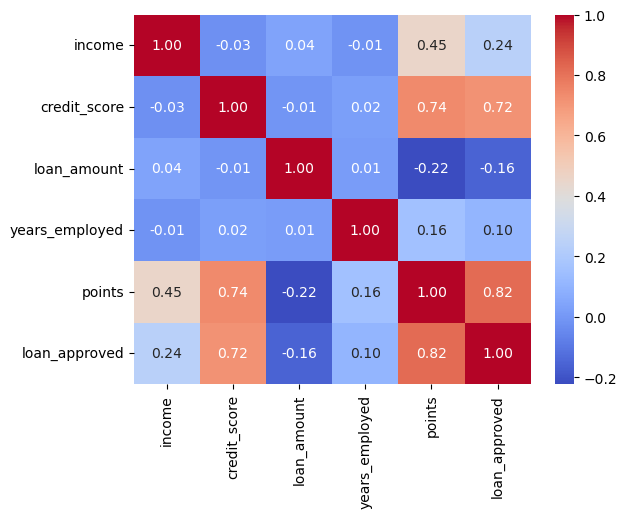

In [143]:
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")

In [141]:
corr_matrix

loan_approved     1.000000
points            0.821415
credit_score      0.715788
income            0.238066
years_employed    0.104408
loan_amount      -0.157859
Name: loan_approved, dtype: float64

Train test split and Feature scaling

In [146]:
x = df.drop("loan_approved", axis=1)
y = df["loan_approved"]

In [147]:
x_train , x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.2, random_state = 42
)

In [149]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [155]:
#Logistic regression

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [156]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))
print("Accuracy :",accuracy_score(y_test, y_pred))
print("Precision :",precision_score(y_test, y_pred))
print("Recall :",recall_score(y_test, y_pred))
print("F1 score :",f1_score(y_test, y_pred))

[[217   0]
 [  0 183]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       217
           1       1.00      1.00      1.00       183

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

Accuracy : 1.0
Precision : 1.0
Recall : 1.0
F1 score : 1.0


In [163]:
#KNN

from sklearn.neighbors import KNeighborsClassifier

kmodel = KNeighborsClassifier(n_neighbors=9)
kmodel.fit(x_train, y_train)
y_predk = kmodel.predict(x_test)

In [166]:
cm = confusion_matrix(y_test, y_predk)
print("CM:",cm)

print("Accuracy :",accuracy_score(y_test, y_predk))
print("Precision :",precision_score(y_test, y_predk))
print("Recall :",recall_score(y_test, y_predk))
print("F1 score :",f1_score(y_test, y_predk))

CM: [[212   5]
 [  3 180]]
Accuracy : 0.98
Precision : 0.972972972972973
Recall : 0.9836065573770492
F1 score : 0.9782608695652174


In [167]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

kmodel = GaussianNB()
kmodel.fit(x_train, y_train)
y_predn = kmodel.predict(x_test)

cm = confusion_matrix(y_test, y_predn)
print("CM:",cm)

print("Accuracy :",accuracy_score(y_test, y_predn))
print("Precision :",precision_score(y_test, y_predn))
print("Recall :",recall_score(y_test, y_predn))
print("F1 score :",f1_score(y_test, y_predn))

CM: [[212   5]
 [ 18 165]]
Accuracy : 0.9425
Precision : 0.9705882352941176
Recall : 0.9016393442622951
F1 score : 0.9348441926345609


Best model on basis of precision 

Feature engineering

In [168]:
df["points"]= df["points"]**2
df["loan_amount"]= df["loan_amount"]**2

df["income_log"] = np.log1p(df["income"])

x = df.drop(columns=["loan_approved","points","loan_amount","income"])
y = df["loan_approved"]

In [169]:
x_train , x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.2, random_state = 42
)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [170]:
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy :",accuracy_score(y_test, y_pred))
print("Precision :",precision_score(y_test, y_pred))
print("Recall :",recall_score(y_test, y_pred))
print("F1 score :",f1_score(y_test, y_pred))

[[194  23]
 [ 26 157]]
Accuracy : 0.8775
Precision : 0.8722222222222222
Recall : 0.8579234972677595
F1 score : 0.8650137741046832


In [173]:
kmodel = KNeighborsClassifier(n_neighbors=5)
kmodel.fit(x_train, y_train)
y_predk = kmodel.predict(x_test)

cm = confusion_matrix(y_test, y_predk)
print("CM:",cm)

print("Accuracy :",accuracy_score(y_test, y_predk))
print("Precision :",precision_score(y_test, y_predk))
print("Recall :",recall_score(y_test, y_predk))
print("F1 score :",f1_score(y_test, y_predk))

CM: [[200  17]
 [ 29 154]]
Accuracy : 0.885
Precision : 0.9005847953216374
Recall : 0.8415300546448088
F1 score : 0.8700564971751412


In [172]:
kmodel = GaussianNB()
kmodel.fit(x_train, y_train)
y_predn = kmodel.predict(x_test)

cm = confusion_matrix(y_test, y_predn)
print("CM:",cm)

print("Accuracy :",accuracy_score(y_test, y_predn))
print("Precision :",precision_score(y_test, y_predn))
print("Recall :",recall_score(y_test, y_predn))
print("F1 score :",f1_score(y_test, y_predn))

CM: [[197  20]
 [ 22 161]]
Accuracy : 0.895
Precision : 0.8895027624309392
Recall : 0.8797814207650273
F1 score : 0.8846153846153846
